# <font color=#003d5c>Árboles de Decisión</font>


Es un algoritmo que proporciona una arquitectura condicional de varios niveles para el análisis predictivo mediante la evaluación de la ganancia de información incremental.

<img src="images/groot.gif"></img>

Piense en el árbol de decisión como un un árbol lleno de condiciones `if-else`. La condición más eficiente se encuentra en la parte superior y disminuye gradualmente a medida que descendemos (en la mayoría de los casos).

<font color=#003d5c>**¿Por qué aprenderemos Árboles de Decisión?**</font>

- Puede aplicarse a problemas de regresión y clasificación
- Tienen muchas propiedades útiles
- Son muy populares
- Son la base de modelos más complejos
- Tienen una forma diferente de "pensar" que los otros modelos que hemos estudiado

## <font color=#003d5c>Objetivos de la lección</font>

Los estudiantes podrán:

- Explicar cómo se crea un árbol de decisión
- Construir un modelo de árbol de decisión en scikit-learn
- Tunear un modelo de árbol de decisión y  explicar cómo el tuning impacta al modelo.
- Interpretar un diagrama de árbol
- Describir las diferencias principales entre los árboles de regresión y clasificación
- Decida si un árbol de decisión es un modelo apropiado para un problema dado

Esta parte teórica se puede revisar en el octavo capítulo del libro [**Introduction to Statistical Learning**](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf).

In [1]:
from IPython.lib.display import YouTubeVideo

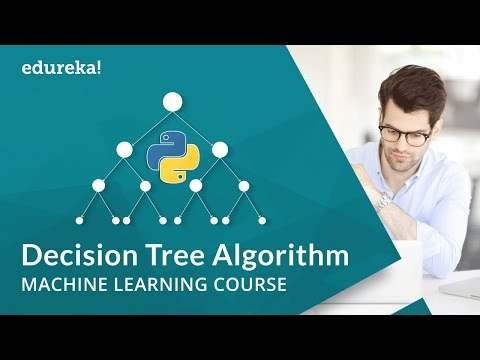

In [2]:
YouTubeVideo('qDcl-FRnwSU', width=1000,height=400)

# <font color=#003d5c>1. Árboles de Regresión</font>

Datos de un jugador de Grandes Ligas de 1986-87::

- **Años** (eje x): número de años jugando en las ligas mayores
- **Hits** (eje y): número de hits en el año anterior
- **Salario** (color): el salario bajo es azul / verde, el salario alto es rojo / amarillo

![Salary data](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_color.png)

**Ejercicio grupal:**

- Los datos anteriores son nuestros **datos de entrenamiento**.
- Queremos construir un modelo que prediga el salario de **futuros jugadores** basado en años y Hits.
- Vamos a "segmentar" el grupo de características en regiones, y luego usar el **salario medio en cada región** como el salario previsto para los futuros jugadores.
- Se quiere **maximizar** la similitud (u "homogeneidad") dentro de una región determinada, y **minimizar** la similitud entre diferentes regiones.


**Reglas para segmentar:**

- Solo puedes usar **líneas rectas**, dibujadas una a la vez.
- Estas líneas deben ser verticales u horizontales.
- Una línea **se detiene** cuando golpea una línea existente.

![Salary regions](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_regions.png)

Arriba están las regiones creadas por una computadora::

- $R_1$: jugadores con **menos de 5 años** de experiencia, salario medio de **\$166,000**
- $R_2$: jugadores con **5 o más años** de experiencia y **menos de 118 visitas**, salario medio de **\$403,000**
- $R_3$: jugadores con **5 o más años** de experiencia y **118 hits o más**, Salario medio de **\$846,000**

**Nota:** Años y Hits son enteros, pero la convención es usar el **punto medio** entre valores adyacentes para etiquetar una división.

Estas regiones se usan para hacer predicciones sobre **datos fuera de la muestra**. ¡Por lo tanto, solo hay tres predicciones posibles! (¿Es esto diferente de cómo **la regresión lineal** hace predicciones?)

A continuación se muestra el árbol de regresión equivalente:

![Salary tree](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_tree.png)

La primera división es **Años <4.5**, por lo que esa división va en la parte superior del árbol. Cuando una regla de división es **Verdadero**, sigue la rama izquierda. Cuando una regla de división es **Falsa**, sigue la rama derecha.

Para los jugadores en la **rama izquierda**, el Salario medio es \$166,000, por lo que se etiqueta con ese valor. (El salario se ha dividido por 1000 y se ha transformado a 5.11 usando el logaritmo).

Para jugadores en la **rama derecha**, hay una división adicional en **Hits <117.5**, dividiendo jugadores en dos regiones Salario más: \$403,000 (transformado a 6.00), y \$846,000 (transformado a 6.74).

![Salary tree annotated](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_tree_annotated.png)

**¿Qué le dice este árbol acerca de sus datos?¿Qué insights puedes obtener?**

- Años es el factor más importante que determina el Salario, con un menor número de años correspondientes a un Salario inferior.
- Para un jugador con un número menor de años, Hits no es un factor importante que determina el salario.
- Para un jugador con un mayor número de años, Hits es un factor importante que determina el salario, con un mayor número de Hits correspondientes a un salario más alto.

**Pregunta del Millón:** ¿Qué le gusta y qué le desagrada de los árboles de decisión hasta el momento?

## <font color=#003d5c>I. Construir un árbol de regresión a mano</font>

Los **datos de entrenamiento** están en un pequeño dataset de [precios de venta de vehículos usados](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_train.csv). Su meta es **predecir el precio** para los datos de prueba.

1. Lea los datos en un DataFrame.
2. Explore los datos por medio de gráficas, o agrupaciones (recordar el uso del `group_by`).
3. Decida qué característica es el predictor más importante y utilícela para crear su primera regla de división.
    - Solo se permiten divisiones binarias.
4. Después de hacer su primera división, divida su DataFrame en dos partes y luego explore cada parte para descubrir qué otras divisiones hacer.
5. Deje de hacer divisiones una vez que esté convencido de que logra un buen equilibrio entre el ajuste insuficiente (underfitting) y el ajuste excesivo (overfitting).
    - Tu objetivo es construir un modelo que generalice bien.
    - ¡Puedes dividir la misma variable varias veces!
6. Dibuje su árbol, etiquetando las hojas con el precio promedio de las observaciones en esa región.
    - Asegúrate de que nada esté al revés: sigue la **rama izquierda** si la regla es verdadera, y la **rama derecha** si la regla es falsa.

## <font color=#003d5c>¿Cómo construye una computadora un árbol de regresión?</font>

**Enfoque ideal:** Considera cada posible partición del grupo de características (no factible computacionalmente)

**Enfoque "suficientemente bueno":** división binaria recursiva

1. Comienza en la parte superior del árbol
2. Para **cada característica**, examina **todos los puntos de corte posibles**, y elige la característica y el punto de corte para que el árbol resultante tenga el error cuadrático medio (MSE) más bajo posible.
3. Examina las dos regiones resultantes, y nuevamente haga una **división simple** (en una de las regiones) para minimizar el MSE.
4. Continúa repitiendo el paso 3 hasta que se cumpla un **criterio de detención**:
    - profundidad máxima del árbol (número máximo de divisiones requeridas para llegar a una hoja)
    - número mínimo de observaciones en una hoja

### <font color=#003d5c>Aplicación de la lógica: Elegir el punto de corte ideal para una característica dada</font>

In [3]:
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
url = 'data/vehicles_train.csv'
train = pd.read_csv(url, encoding="latin1")

In [6]:
train.head()

,price,year,miles,doors,vtype
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


In [7]:
train["vtype"].value_counts()

car      11
truck     3
Name: vtype, dtype: int64

In [8]:
# Codificar "car" como 0 y "truck" como 1
train['vtype'] = train.vtype.map({'car':0, 'truck':1})

In [9]:
train

,price,year,miles,doors,vtype
0,22000,2012,13000,2,0
1,14000,2010,30000,2,0
2,13000,2010,73500,4,0
3,9500,2009,78000,4,0
4,9000,2007,47000,4,0
5,4000,2006,124000,2,0
6,3000,2004,177000,4,0
7,2000,2004,209000,4,1
8,3000,2003,138000,2,0
9,1900,2003,160000,4,0


In [10]:
# Antes de hacer las divisiones, calculemos la media de todo el dataset para que sea nuestra valor de predicción
train['prediction_sin_reglas'] = train.price.mean()
train

,price,year,miles,doors,vtype,prediction_sin_reglas
0,22000,2012,13000,2,0,6571.428571
1,14000,2010,30000,2,0,6571.428571
2,13000,2010,73500,4,0,6571.428571
3,9500,2009,78000,4,0,6571.428571
4,9000,2007,47000,4,0,6571.428571
5,4000,2006,124000,2,0,6571.428571
6,3000,2004,177000,4,0,6571.428571
7,2000,2004,209000,4,1,6571.428571
8,3000,2003,138000,2,0,6571.428571
9,1900,2003,160000,4,0,6571.428571


**<font color=#003d5c>Calcular el error (MSE):</font>**

In [11]:
(((train['price'] - train['prediction_sin_reglas'])**2).mean()) ** 0.5

5936.981985995983

In [12]:
train.columns

Index(['price', 'year', 'miles', 'doors', 'vtype', 'prediction_sin_reglas'], dtype='object')

**<font color=#003d5c>a) Elegir nuestra primera mejor división:</font>**
<br><br>
Por ejemplo dividamos todo el dataset por la variable `year` y el valor de `2010` y calculemos los promedios del precio en las 2 regiones obtenidas y asignarles como valor de predicción en la variable `pred`.

In [13]:
year = 2010

In [14]:
train.loc[train.year < year, :]

,price,year,miles,doors,vtype,prediction_sin_reglas
3,9500,2009,78000,4,0,6571.428571
4,9000,2007,47000,4,0,6571.428571
5,4000,2006,124000,2,0,6571.428571
6,3000,2004,177000,4,0,6571.428571
7,2000,2004,209000,4,1,6571.428571
8,3000,2003,138000,2,0,6571.428571
9,1900,2003,160000,4,0,6571.428571
10,2500,2003,190000,2,1,6571.428571
11,5000,2001,62000,4,0,6571.428571
12,1800,1999,163000,2,1,6571.428571


In [15]:
train.loc[train.year >= year, :]

,price,year,miles,doors,vtype,prediction_sin_reglas
0,22000,2012,13000,2,0,6571.428571
1,14000,2010,30000,2,0,6571.428571
2,13000,2010,73500,4,0,6571.428571


In [16]:
train.loc[train.year < year, 'pred_año_2010'] = train.loc[train.year < year, 'price'].mean()
train.loc[train.year >=year, 'pred_año_2010'] = train.loc[train.year >=year, 'price'].mean()

In [17]:
train

,price,year,miles,doors,vtype,prediction_sin_reglas,pred_año_2010
0,22000,2012,13000,2,0,6571.428571,16333.333333
1,14000,2010,30000,2,0,6571.428571,16333.333333
2,13000,2010,73500,4,0,6571.428571,16333.333333
3,9500,2009,78000,4,0,6571.428571,3909.090909
4,9000,2007,47000,4,0,6571.428571,3909.090909
5,4000,2006,124000,2,0,6571.428571,3909.090909
6,3000,2004,177000,4,0,6571.428571,3909.090909
7,2000,2004,209000,4,1,6571.428571,3909.090909
8,3000,2003,138000,2,0,6571.428571,3909.090909
9,1900,2003,160000,4,0,6571.428571,3909.090909


In [18]:
(((train['price'] - train['pred_año_2010'])**2).mean()) ** 0.5

3042.740277820044

<font color=#003d5c>Región de la Izquierda:</font>

In [19]:
train_izq = train.loc[train.year<2010].copy()

In [20]:
train_izq.year.unique()

array([2009, 2007, 2006, 2004, 2003, 2001, 1999, 1997], dtype=int64)

<font color=#003d5c>Región de la Derecha:</font>

In [21]:
train_der = train.loc[train.year>=2010].copy()

In [22]:
train_der.year.unique()

array([2012, 2010], dtype=int64)

Definamos una función que nos permite calcular el error obtenido por la división en 2 regiones en base a un valor de la variable `year`.

In [23]:
def error_año(train, year):
    train.loc[train.year <year, 'pred'] = train.loc[train.year <year, 'price'].mean()
    train.loc[train.year>=year, 'pred'] = train.loc[train.year>=year, 'price'].mean()
    return((((train['price'] - train['pred'])**2).mean()) ** 0.5)

In [24]:
error_min = float('inf')
year_split = 0
for year in train.year.unique():
    error_año_var = error_año(train, year)
    print(year, ": ", error_año_var)
    if error_año_var < error_min:
        error_min = error_año_var
        year_split = year
print("Se debe hacer la división por el valor de ", year_split, "ya que genera 2 regiones que nos permiten obtener un error de ", error_min)

2012 :  4115.449316529494
2010 :  3042.740277820044
2009 :  3050.2049111494134
2007 :  2928.8656453060403
2006 :  3717.4019665557266
2004 :  4828.983058673159
2003 :  5582.125927469737
2001 :  5571.830724191791
1999 :  5754.148049904502
1997 :  5936.981985995983
Se debe hacer la división por el valor de  2007 ya que genera 2 regiones que nos permiten obtener un error de  2928.8656453060403


**<font color=#003d5c>b) Evaluar el punto de corte con el MSE más bajo:</font>**

¿Pero es correcto que hayamos elegido la variable `year`?

In [25]:
def error_split(train, var, value):
    train.loc[train[var] <value, 'pred'] = train.loc[train[var] <value, 'price'].mean()
    train.loc[train[var]>=value, 'pred'] = train.loc[train[var]>=value, 'price'].mean()
    return ((((train['price'] - train['pred'])**2).mean()) ** 0.5)

In [26]:
error_min, var_final, val_final = float('inf'), '', 0
for var_ in ['year', 'miles', 'doors', 'vtype']:
    print('-------------{}-------------'.format(var_))
    for val_ in train[var_].unique():
        error = error_split(train, var_, val_)
        print(val_, ": ", error)
        if error < error_min:
            error_min = error
            var_final, val_final = var_, val_
print("\n--------------------------------------------------")
print("Se debe hacer la división por el valor de ", val_final, " de la variable ", var_final, " ya que genera 2 regiones que nos permiten obtener un error de ", error_min)

-------------year-------------
2012 :  4115.449316529494
2010 :  3042.740277820044
2009 :  3050.2049111494134
2007 :  2928.8656453060403
2006 :  3717.4019665557266
2004 :  4828.983058673159
2003 :  5582.125927469737
2001 :  5571.830724191791
1999 :  5754.148049904502
1997 :  5936.981985995983
-------------miles-------------
13000 :  5936.981985995983
30000 :  4115.449316529494
73500 :  4603.104542433446
78000 :  3880.3125385496196
47000 :  3671.3822491055903
124000 :  3530.146530076269
177000 :  5543.1834821592465
209000 :  5800.018946539725
138000 :  4032.7485942579897
160000 :  4982.451745559148
190000 :  5668.800368600716
62000 :  3984.0917425414564
163000 :  5294.798660680391
-------------doors-------------
2 :  5936.981985995983
4 :  5827.257890621414
-------------vtype-------------
0 :  5936.981985995983
1 :  5458.473693711005

--------------------------------------------------
Se debe hacer la división por el valor de  2007  de la variable  year  ya que genera 2 regiones que nos

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['font.size'] = 14

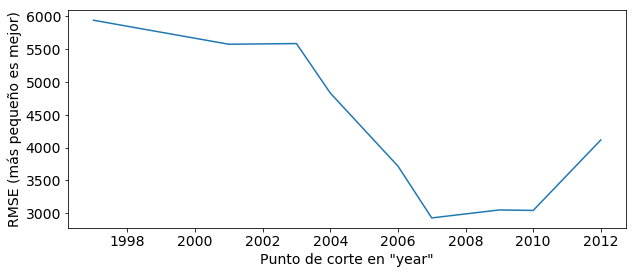

In [30]:
# Graficar la variable 'year' (eje-X) versus RMSE (eje-y)
values = train['year'].unique()
errors = [error_split(train, 'year', v) for v in values]
plt.plot(values, errors)
plt.xlabel('Punto de corte en "year"')
plt.ylabel('RMSE (más pequeño es mejor)')

**<font color=#003d5c>c) Examina las 2 regiones resultantes:</font>**

In [31]:
train_izq = train.loc[train['year'] <2007, :]
train_der = train.loc[train['year']>=2007, :]

In [32]:
train_izq.head()

,price,year,miles,doors,vtype,prediction_sin_reglas,pred_año_2010,pred
5,4000,2006,124000,2,0,6571.428571,3909.090909,6571.428571
6,3000,2004,177000,4,0,6571.428571,3909.090909,6571.428571
7,2000,2004,209000,4,1,6571.428571,3909.090909,6571.428571
8,3000,2003,138000,2,0,6571.428571,3909.090909,6571.428571
9,1900,2003,160000,4,0,6571.428571,3909.090909,6571.428571


**<font color=#003d5c>d) Evaluar si se cumple criterio de detención:</font>**

In [33]:
train_izq.shape

(9, 8)

In [34]:
train_der.shape

(5, 8)

**<font color=#003d5c>Continuar el Ciclo:</font>**
<br><br>Con la región de la Izquierda

In [35]:
error_min, var_final, val_final = float('inf'), '', 0
for var_ in ['year', 'miles', 'doors', 'vtype']:
    print('-------------{}-------------'.format(var_))
    for val_ in train_izq[var_].unique():
        error = error_split(train_izq, var_, val_)
        print(val_, ": ", error)
        if error < error_min:
            error_min = error
            var_final, val_final = var_, val_
print("\n--------------------------------------------------")
print("Se debe hacer la división por el valor de ", val_final, " de la variable ", var_final, " ya que genera 2 regiones que nos permiten obtener un error de ", error_min)

-------------year-------------
2006 :  1014.2731387550397
2004 :  1092.8216960050065
2003 :  1110.2218663819374
2001 :  916.6450213894665
1999 :  989.9494936611666
1997 :  1110.3330609203888
-------------miles-------------
124000 :  764.3988196979084
177000 :  1099.157926845887
209000 :  1080.5734074503634
138000 :  574.3180911666199
160000 :  970.6527013647398
190000 :  1081.2617556017526
62000 :  1110.3330609203888
163000 :  1051.9558503621295
-------------doors-------------
2 :  1110.3330609203888
4 :  1106.52107476039
-------------vtype-------------
0 :  1110.3330609203888
1 :  1019.4406599990306

--------------------------------------------------
Se debe hacer la división por el valor de  138000  de la variable  miles  ya que genera 2 regiones que nos permiten obtener un error de  574.3180911666199


In [36]:
train_izq_izq = train_izq.loc[train_izq['miles']< 138000]
train_izq_der = train_izq.loc[train_izq['miles']>=138000]

In [37]:
print(train_izq_izq.shape)
print(train_izq_der.shape)

(2, 8)
(7, 8)


Con la región de la Derecha

In [38]:
error_min, var_final, val_final = float('inf'), '', 0
for var_ in ['year', 'miles', 'doors', 'vtype']:
    print('-------------{}-------------'.format(var_))
    for val_ in train_der[var_].unique():
        error = error_split(train_der, var_, val_)
        print(val_, ": ", error)
        if error < error_min:
            error_min = error
            var_final, val_final = var_, val_
print("\n--------------------------------------------------")
print("Se debe hacer la división por el valor de ", val_final, " de la variable ", var_final, " ya que genera 2 regiones que nos permiten obtener un error de ", error_min)

-------------year-------------
2012 :  1933.2614929181204
2010 :  3123.833115474214
2009 :  4091.148982865327
2007 :  4669.047011971501
-------------miles-------------
13000 :  4669.047011971501
30000 :  1933.2614929181204
73500 :  4292.43520626695
78000 :  4219.004621945797
47000 :  2880.972058177587
-------------doors-------------
2 :  4669.047011971501
4 :  2880.972058177587
-------------vtype-------------
0 :  4669.047011971501

--------------------------------------------------
Se debe hacer la división por el valor de  2012  de la variable  year  ya que genera 2 regiones que nos permiten obtener un error de  1933.2614929181204


In [39]:
train_der_izq = train_der.loc[train_der['year']< 2012]
train_der_der = train_der.loc[train_der['year']>=2012]

In [40]:
print(train_der_izq.shape)
print(train_der_der.shape)

(4, 8)
(1, 8)


In [41]:
train_der_izq = train_der.loc[train_der['miles']< 30000]
train_der_der = train_der.loc[train_der['miles']>=30000]

In [42]:
print(train_der_izq.shape)
print(train_der_der.shape)

(1, 8)
(4, 8)


<div class="alert alert-info" role="alert">
  <strong>Recordar:</strong> Antes de cada división, este proceso se repite para cada característica, y se eligen la característica y el punto de corte que produce la `RMSE` más baja.
</div>

## <font color=#003d5c>II. Construyendo un árbol de regresión en scikit-learn</font>

Definir nuestro dataset de Entrenamiento y el Target

In [46]:
predictores = ['year', 'miles', 'doors', 'vtype']
X = train[predictores]
y = train.price

In [47]:
# Instanciar un objeto de la clase DecisionTreeRegressor (con random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1, max_depth=2, criterion='mse')
treereg

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [48]:
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

Visualizar el Árbol de Regresión

In [49]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG

In [50]:
#graph = Source( export_graphviz(treereg, out_file=None, feature_names=predictores, filled=True))
#SVG(graph.pipe(format='svg'))

Leyendo los nodos internos:

- **samples:** cantidad de observaciones en ese nodo antes de dividir
- **mse:** MSE calculado al comparar los valores de respuesta reales en ese nodo con el valor de respuesta promedio en ese nodo
- **regla:** regla utilizada para dividir ese nodo (ir a la izquierda si es verdadero, ir a la derecha si es falso)

Leyendo las hojas:

- **samples:** cantidad de observaciones en ese nodo
- **value:** valor de respuesta promedio en ese nodo
- **mse:** MSE calculado al comparar los valores de respuesta reales en ese nodo contra "value"

## <font color=#003d5c>III. Tunning en un árbol de regresión usando scikit-learn</font>

```python
Usando  for
```

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [52]:
error_list = []
for max_depth in range(1, 9):
    treereg = DecisionTreeRegressor(random_state=1, max_depth=max_depth, criterion='mse')
    treereg.fit(X, y)
    error = np.sqrt(mean_squared_error(y, treereg.predict(X)))
    error_list.append(error)
    print('max_depth={}, error={}'.format(max_depth, error))

max_depth=1, error=2928.8656453060403
max_depth=2, error=1243.729168628749
max_depth=3, error=364.2997196187306
max_depth=4, error=234.5207879911715
max_depth=5, error=188.9822365046136
max_depth=6, error=94.4911182523068
max_depth=7, error=0.0
max_depth=8, error=0.0


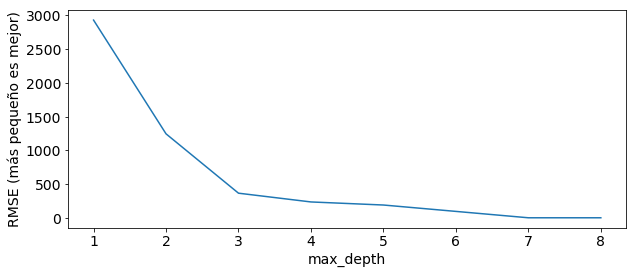

In [53]:
# Graficar la variable 'year' (eje-X) versus RMSE (eje-y)
values = range(1, 9)
plt.plot(values, error_list)
plt.xlabel('max_depth')
plt.ylabel('RMSE (más pequeño es mejor)')

In [54]:
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [55]:
treereg = DecisionTreeRegressor(random_state=1, max_depth=max_depth, criterion='mse')
parameters = {'max_depth': list(range(1, 9))}

In [57]:
clf = GridSearchCV(treereg, parameters)

In [58]:
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [59]:
clf.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [60]:
import numpy as np
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3107.1428571428573

## <font color=#003d5c>¿Qué sucede cuando generamos un árbol demasiado profundo?</font>

- Izquierda: Árbol de regresión para Salario **crecimiento más profundo**
- Derecha: Comparación de **errores de entrenamiento, prueba y validación cruzada** para árboles con diferentes números de hojas

![Salary tree grown deep](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_tree_deep.png)

El **error de entrenamiento** continúa disminuyendo a medida que aumenta el tamaño del árbol (debido al sobreajuste), pero el error **de validación cruzada** más bajo ocurre para un árbol con 3 hojas.

## Tuning: Ajustando un árbol de regresión

Tratemos de reducir el RMSE ajustando el parámetro **max_depth**:

In [61]:
# prueba diferentes valores uno a uno
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4050.1443001443

O bien, podríamos hacer un bucle para probar un rango de valores:

In [62]:
# lista de valores para probar
max_depth_range = range(1, 8)

# lista para almacenar el RMSE promedio para cada valor de max_depth
RMSE_scores = []

# use LOOCV con cada valor de max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

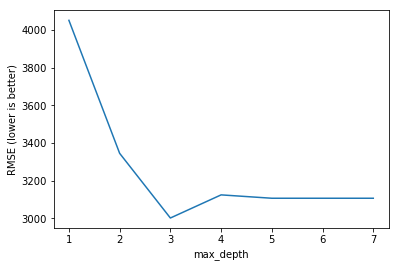

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [64]:
# max_depth = 3 fue el mejor, así que ajuste un árbol usando ese parámetro
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [65]:
# "Importancia de Gini" de cada característica: la reducción total de errores (normalizada) provocada por esa característica
pd.DataFrame({'feature':predictores, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,vtype,0.000000


## Hacer predicciones para los datos de prueba

In [66]:
# Leer la data de prueba
url = 'data/vehicles_test.csv'
test = pd.read_csv(url, encoding="latin1")
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test




,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


**Pregunta: ** Usando el diagrama de árbol de arriba, ¿qué predicciones hará el modelo para cada observación?

In [67]:
# utilizar el modelo ajustado para hacer predicciones sobre los datos de prueba
X_test = test[predictores]
y_test = test.price
y_pred = treereg.predict(X_test)
y_pred

array([ 4000.,  5000., 13500.])

In [68]:
# calcular RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

1190.2380714238084

# <font color=#003d5c>2. Árboles de clasificación</font>
Una pequeña Introducción en la siguiente página: <a href="http://www.r2d3.us/una-introduccion-visual-al-machine-learning-1/">http://www.r2d3.us/</a>

## Comparación de árboles de regresión y árboles de clasificación

|Árbol de regresión|Árbol de clasificación|
|---|---|
|Predice una respuesta continua|Predice una respuesta categórica|
|Predice usando la respuesta media de cada hoja|Predice usando la clase más común en cada hoja|
|Las divisiones se eligen para minimizar MSE|Las divisiones se eligen para minimizar el índice de Gini (discutido a continuación)|

## Criterios de división para los árboles de clasificación

Opciones comunes para los criterios de división:

- **Tasa de error de clasificación:** fracción de observaciones de entrenamiento en una región que no pertenece a la clase más común
- **Índice de Gini:** medida de la varianza total entre clases en una región
- **Entropía:** medida del desorden. La entropía es un indicador de lo desordenado que son tus datos.
<img src="https://sebastianraschka.com/images/faq/decision-tree-binary/overview-plot.png">

### Ejemplo de tasa de error de clasificación

Imagina que estamos prediciendo si alguien compra un iPhone o un Android:

- En un nodo en particular, hay **25 observaciones** (compradores de teléfonos), de los cuales **10 compraron iPhones y 15 compraron Android**.
- Dado que la clase mayoritaria es **Android**, esa es nuestra predicción para las 25 observaciones, y por lo tanto la tasa de error de clasificación es **10/25 = 40%**.

Nuestro objetivo al hacer splits es **reducir la tasa de error de clasificación**. Probemos dividir en género:

- **Hombres:** 2 iPhones y 12 Androids, por lo tanto, la clase predicha es Android. (2 equivocaciones)
- **Mujeres:** 8 iPhones y 3 Androids, por lo que la clase prevista es iPhone. (3 equivocaciones)
- Tasa de error de clasificación después de esta división sería **5/25 = 20%**

Compare eso con una división en la edad:

- **30 o menos:** 4 iPhones y 8 Androids, por lo tanto, la clase predicha es Android. (4 equivocaciones)
- **31 o más:** 6 iPhones y 7 Androids, por lo tanto, la clase predicha es Android. (6 equivocaciones)
- Tasa de error de clasificación después de esta división sería **10/25 = 40%**

El algoritmo del árbol de decisión intentará **cada división posible en todas las características**, y elegirá la división que más **reduzca la tasa de error.**

### Ejemplo de Índice de Gini

Calcule el índice de Gini antes de hacer una división:

$$1 - \left(\frac {iPhone} {Total}\right)^2 - \left(\frac {Android} {Total}\right)^2 = 1 - \left(\frac {10} {25}\right)^2 - \left(\frac {15} {25}\right)^2 = 0.48$$

- El **valor máximo** del índice de Gini es 0.5, y ocurre cuando las clases están perfectamente balanceadas en un nodo.
- El **valor mínimo** del índice de Gini es 0, y ocurre cuando solo hay una clase representada en un nodo.
- Se dice que un nodo con **un índice de Gini más bajo es más "puro"**.

Evaluar la división en ** sexo ** usando el índice de Gini:

$$\text{Hombres: } 1 - \left(\frac {2} {14}\right)^2 - \left(\frac {12} {14}\right)^2 = 0.24$$
$$\text{Mujeres: } 1 - \left(\frac {8} {11}\right)^2 - \left(\frac {3} {11}\right)^2 = 0.40$$
$$\text{Peso Promedio: } 0.24 \left(\frac {14} {25}\right) + 0.40 \left(\frac {11} {25}\right) = 0.31$$

Evaluar la división en **edad** usando el índice de Gini:

$$\text{30 o joven: } 1 - \left(\frac {4} {12}\right)^2 - \left(\frac {8} {12}\right)^2 = 0.44$$
$$\text{31 o viejo: } 1 - \left(\frac {6} {13}\right)^2 - \left(\frac {7} {13}\right)^2 = 0.50$$
$$\text{Peso Promedio: } 0.44 \left(\frac {12} {25}\right) + 0.50 \left(\frac {13} {25}\right) = 0.47$$

De nuevo, el algoritmo del árbol de decisiones intentará **cada posible división**, y elegirá la división que **reduce el índice de Gini (y así aumenta la "pureza del nodo") más.**

### Comparando la tasa de error de clasificación y el índice de Gini

- Generalmente se prefiere el índice de Gini porque hará divisiones que **aumentan la pureza del nodo**, incluso si esa división no cambia la tasa de error de clasificación.
- La pureza del nodo es importante porque nos interesan las **proporciones de clase** en cada región, ya que así es como calculamos la **probabilidad pronosticada** de cada clase.
- Los criterios de división predeterminados de scikit-learn para los árboles de clasificación son el índice de Gini.

Nota: Hay otro criterio de división común llamado **entropía cruzada**. Es numéricamente similar al índice de Gini, pero más lento de calcular, por lo tanto, no es tan popular como el índice de Gini. Queda como tarea revisarla.

## Construyendo un árbol de clasificación en scikit-learn

Construiremos un árbol de clasificación usando el dataset de Crédito Hipotecario:

In [71]:
# Lectura del dataset
df = pd.read_csv('data/DS_Credito Hipotecario.csv')

# Preprocesamiento de la data
df['SEXO'].fillna(df['SEXO'].mode()[0], inplace=True)
df['FLAG_CASADO'].fillna(df['FLAG_CASADO'].mode()[0], inplace=True)
df['NRO_DEPENDIENTES'].fillna(df['NRO_DEPENDIENTES'].mode()[0], inplace=True)
df['FLAG_TRAB_INDEP'].fillna(df['FLAG_TRAB_INDEP'].mode()[0], inplace=True)
df['INGRESOS_COSOLICITANTE'].fillna(df['INGRESOS_COSOLICITANTE'].mean(), inplace=True)
df['MONTO_PRESTAMO_MILES'].fillna(df['MONTO_PRESTAMO_MILES'].mean(), inplace=True)
df['PLAZO_PRESTAMO_MESES'].fillna(df['PLAZO_PRESTAMO_MESES'].mean(), inplace=True)
df['FLAG_HISTORIAL_CREDITICIO'].fillna(df['FLAG_HISTORIAL_CREDITICIO'].mode()[0], inplace=True)

df['SEXO'] = df['SEXO'].map({'Male': 0, 'Female': 1})
df['FLAG_CASADO'] = df['FLAG_CASADO'].map({'No': 0, 'Yes': 1})
df['EDUCACION'] = df['EDUCACION'].map({'Not Graduate': 0, 'Graduate': 1})
df['FLAG_TRAB_INDEP'] = df['FLAG_TRAB_INDEP'].map({'No': 0, 'Yes': 1})
df['FLAG_HISTORIAL_CREDITICIO'] = df['FLAG_HISTORIAL_CREDITICIO'].map({'Malo': 0, 'Bueno': 1})
df = pd.concat([df, pd.get_dummies(df['TIPO_ZONA'], prefix = 'TIPO_ZONA', drop_first = True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['NRO_DEPENDIENTES'], prefix = 'NRO_DEPENDIENTES', drop_first = True)], axis=1)
del df['TIPO_ZONA']
del df['NRO_DEPENDIENTES']
df['FLAG_CRED_HIPO'] = df['FLAG_CRED_HIPO'].map({'Y': 1, 'N': 0})

In [72]:
df.head()

,ID,SEXO,FLAG_CASADO,EDUCACION,FLAG_TRAB_INDEP,INGRESOS_SOLICITANTE,INGRESOS_COSOLICITANTE,MONTO_PRESTAMO_MILES,PLAZO_PRESTAMO_MESES,FLAG_HISTORIAL_CREDITICIO,FLAG_CRED_HIPO,TIPO_ZONA_Semiurban,TIPO_ZONA_Urban,NRO_DEPENDIENTES_1,NRO_DEPENDIENTES_2,NRO_DEPENDIENTES_3+
0,LP001002,0,0,1,0,5849,0.0,146.412162,360.0,1,1,0,1,0,0,0
1,LP001003,0,1,1,0,4583,1508.0,128.000000,360.0,1,0,0,0,1,0,0
2,LP001005,0,1,1,1,3000,0.0,66.000000,360.0,1,1,0,1,0,0,0
3,LP001006,0,1,0,0,2583,2358.0,120.000000,360.0,1,1,0,1,0,0,0
4,LP001008,0,0,1,0,6000,0.0,141.000000,360.0,1,1,0,1,0,0,0


- **FLAG_CRED_HIPO:** 0=No al CH, 1=Sí al CH (Target)
- **EDUCACION:** 0=No Graduado, 1=Graduado
    - ¿Qué pasará si el árbol se divide en esta característica?
- **SEXO:** 0=hombre, 1=mujer
- **INGRESOS_SOLICITANTE:** valor numérico
- **FLAG_HISTORIAL_CREDITICIO:** Bueno o Malo

In [73]:
# Definir X e Y
predictores = ['SEXO', 'FLAG_CASADO', 'EDUCACION', 'FLAG_TRAB_INDEP', 'INGRESOS_SOLICITANTE', 'INGRESOS_COSOLICITANTE',
                'MONTO_PRESTAMO_MILES', 'PLAZO_PRESTAMO_MESES','FLAG_HISTORIAL_CREDITICIO', 'TIPO_ZONA_Semiurban',
                'TIPO_ZONA_Urban', 'NRO_DEPENDIENTES_1', 'NRO_DEPENDIENTES_2','NRO_DEPENDIENTES_3+']
X = df[predictores]
y = df.FLAG_CRED_HIPO

In [74]:
# Entrenar un árbol de decisión con max_depth=3 con todos los datos
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

Para poder visualizar la estructura del árbol necesitan tener instalado lo siguiente:

Librería de Python Graphviz. Ejecutar **pip install graphviz** en la ventana de línea de comandos. <br>
Software Graphviz (Graph Visualization). Lo pueden descargar desde este enlace: [LINK](https://graphviz.gitlab.io/_pages/Download/Download_windows.html)<br>
**Nota**: Recordar que deben referenciarla en variables de entorno. Es decir, copiar ruta "C:\Program Files (x86)\Graphviz2.38\bin" (verificar que esta ruta exista en su portátil después de la instalación) en la variable de entorno del sistema "Path"

In [75]:
#graph = Source(export_graphviz(treeclf, out_file=None, feature_names=predictores, filled=True))
#SVG(graph.pipe(format='svg'))

In [76]:
from IPython.display import SVG
from IPython.display import display                               
from ipywidgets import interactive

def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0 
          , criterion = crit
          , splitter = split
          , max_depth = depth
          , min_samples_split=min_split
          , min_samples_leaf=min_leaf)
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
          , out_file=None
          , feature_names=predictores
          , class_names=['0', '1', '2']
          , filled = True))

    display(SVG(graph.pipe(format='svg')))

    return estimator

In [77]:
"""inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))
display(inter)"""

'inter=interactive(plot_tree \n   , crit = ["gini", "entropy"]\n   , split = ["best", "random"]\n   , depth=[1,2,3,4]\n   , min_split=(0.1,1)\n   , min_leaf=(0.1,0.5))\ndisplay(inter)'

In [78]:
df.shape

(614, 16)

Distribución del Target en el primer nivel

In [79]:
df.groupby('FLAG_CRED_HIPO').count()

,ID,SEXO,FLAG_CASADO,EDUCACION,FLAG_TRAB_INDEP,INGRESOS_SOLICITANTE,INGRESOS_COSOLICITANTE,MONTO_PRESTAMO_MILES,PLAZO_PRESTAMO_MESES,FLAG_HISTORIAL_CREDITICIO,TIPO_ZONA_Semiurban,TIPO_ZONA_Urban,NRO_DEPENDIENTES_1,NRO_DEPENDIENTES_2,NRO_DEPENDIENTES_3+
FLAG_CRED_HIPO,,,,,,,,,,,,,,,
0,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192
1,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422


Cálculo de Gini

In [80]:
gini = 1 - (192.0/614)**2 - (422/614)**2
round(gini, 3)

0.43

Región de la Izquierda

In [81]:
df_izq = df.loc[df['FLAG_HISTORIAL_CREDITICIO'] <= 0.5]

In [82]:
df_izq.groupby('FLAG_CRED_HIPO').count()

,ID,SEXO,FLAG_CASADO,EDUCACION,FLAG_TRAB_INDEP,INGRESOS_SOLICITANTE,INGRESOS_COSOLICITANTE,MONTO_PRESTAMO_MILES,PLAZO_PRESTAMO_MESES,FLAG_HISTORIAL_CREDITICIO,TIPO_ZONA_Semiurban,TIPO_ZONA_Urban,NRO_DEPENDIENTES_1,NRO_DEPENDIENTES_2,NRO_DEPENDIENTES_3+
FLAG_CRED_HIPO,,,,,,,,,,,,,,,
0,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [83]:
gini_izq = 1 - (82.0/89)**2 - (7.0/89)**2
round(gini_izq, 3)

0.145

Región de la Derecha

In [84]:
df_der = df.loc[df['FLAG_HISTORIAL_CREDITICIO'] > 0.5]

In [85]:
df_der.groupby('FLAG_CRED_HIPO').count()

,ID,SEXO,FLAG_CASADO,EDUCACION,FLAG_TRAB_INDEP,INGRESOS_SOLICITANTE,INGRESOS_COSOLICITANTE,MONTO_PRESTAMO_MILES,PLAZO_PRESTAMO_MESES,FLAG_HISTORIAL_CREDITICIO,TIPO_ZONA_Semiurban,TIPO_ZONA_Urban,NRO_DEPENDIENTES_1,NRO_DEPENDIENTES_2,NRO_DEPENDIENTES_3+
FLAG_CRED_HIPO,,,,,,,,,,,,,,,
0,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110
1,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415


In [86]:
gini_der = 1 - (110.0/525)**2 - (415.0/525)**2
round(gini_der, 3)

0.331

In [87]:
gini_2nd_nivel = gini_izq * (89/ 614) + gini_der * (525/ 614)
gini_2nd_nivel

0.30424045327240445

### ¿Por qué Gini y no Error de Clasificación?

<img src="images/decisionTreeMissClassification.png">

Observe la división en esta parte del árbol: la **misma clase** se predice en sus dos hojas. Esa división no afectó la **tasa de error de clasificación**, aunque aumentó la **pureza del nodo**, que es importante porque aumenta la precisión de nuestras probabilidades predichas.

In [89]:
# calculando la importancia de variables
pd.DataFrame({'feature':predictores, 'importance':treeclf.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
8,FLAG_HISTORIAL_CREDITICIO,0.887584
5,INGRESOS_COSOLICITANTE,0.049299
9,TIPO_ZONA_Semiurban,0.043354
6,MONTO_PRESTAMO_MILES,0.019762
0,SEXO,0.000000
1,FLAG_CASADO,0.000000
2,EDUCACION,0.000000
3,FLAG_TRAB_INDEP,0.000000
4,INGRESOS_SOLICITANTE,0.000000
7,PLAZO_PRESTAMO_MESES,0.000000


### Split Train - Test

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
train_accuracy_list, train_auc_list = [], []
test_accuracy_list, test_auc_list = [], []
max_depth_range = list(range(1, 30))
for max_depth in max_depth_range:
    
    treeclf = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    treeclf.fit(X_train, y_train)
    
    y_train_pred = treeclf.predict(X_train)
    y_test_pred = treeclf.predict(X_test)
    
    y_train_pred_proba = treeclf.predict_proba(X_train)[:, 1]
    y_test_pred_proba = treeclf.predict_proba(X_test)[:, 1]
    
    accuracy_train = accuracy_score(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_pred_proba)
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_pred_proba)
    
    train_accuracy_list.append(accuracy_train)
    train_auc_list.append(auc_train)
    test_accuracy_list.append(accuracy_test)
    test_auc_list.append(auc_test)
    
    print("Train - max_depth: {}, accuracy: {}, auc: {}".format(max_depth, accuracy_train, auc_train))
    print("Test - max_depth: {}, accuracy: {}, auc: {} \n".format(max_depth, accuracy_test, auc_test))

Train - max_depth: 1, accuracy: 0.8205128205128205, auc: 0.708257287375502
Test - max_depth: 1, accuracy: 0.7837837837837838, auc: 0.6993589743589743 

Train - max_depth: 2, accuracy: 0.8228438228438228, auc: 0.7689289252750691
Test - max_depth: 2, accuracy: 0.7783783783783784, auc: 0.7056410256410257 

Train - max_depth: 3, accuracy: 0.8321678321678322, auc: 0.7869061897064191
Test - max_depth: 3, accuracy: 0.7837837837837838, auc: 0.7127564102564102 

Train - max_depth: 4, accuracy: 0.8368298368298368, auc: 0.8066564113260677
Test - max_depth: 4, accuracy: 0.7567567567567568, auc: 0.6705128205128206 

Train - max_depth: 5, accuracy: 0.8438228438228438, auc: 0.8294441257756688
Test - max_depth: 5, accuracy: 0.7567567567567568, auc: 0.6629487179487179 

Train - max_depth: 6, accuracy: 0.8531468531468531, auc: 0.8631824581529958
Test - max_depth: 6, accuracy: 0.7513513513513513, auc: 0.6425641025641026 

Train - max_depth: 7, accuracy: 0.8624708624708625, auc: 0.8888512280335819
Test - 

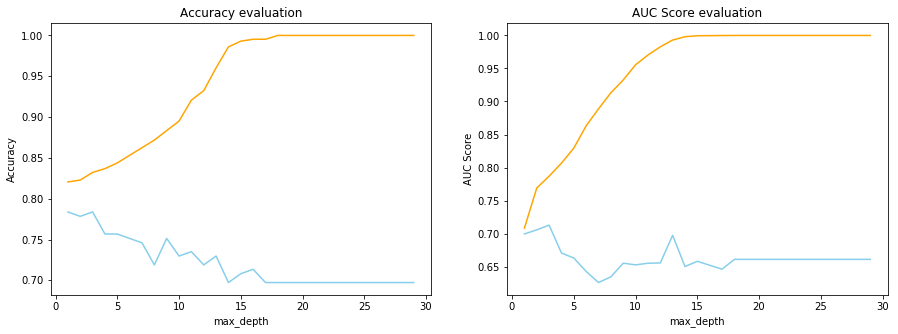

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].plot(max_depth_range, train_accuracy_list, c='orange')
ax[0].plot(max_depth_range, test_accuracy_list,  c='skyblue')
ax[1].plot(max_depth_range, train_auc_list, c='orange')
ax[1].plot(max_depth_range, test_auc_list,  c='skyblue')
ax[0].set_title('Accuracy evaluation')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('Accuracy')
ax[1].set_title('AUC Score evaluation')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('AUC Score')

## <font color=#003d5c>Aplicar al Dataset de Attrition</font>

In [96]:
import pandas as pd

In [97]:
# Cargamos nuestra data de Attrition
df_train_clientes = pd.read_excel('data/train_clientes.xlsx')

In [98]:
df_train_clientes.head()

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,...,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,35653,201208,1,Rang_ingreso_06,Lima,25.0,6.0,0,Rango_SDO_09,0,...,1,1,1,1,1,0,0,0,0,0
1,66575,201208,1,Rang_ingreso_03,Provincia,27.0,0.0,0,Rango_SDO_01,0,...,1,1,1,1,0,0,0,0,0,0
2,56800,201208,1,Rang_ingreso_01,Provincia,34.0,4.0,0,Rango_SDO_02,0,...,0,0,0,0,0,0,0,0,0,0
3,8410,201208,1,Rang_ingreso_04,Provincia,63.0,5.0,0,Rango_SDO_03,0,...,3,3,3,3,1,1,1,1,1,1
4,6853,201208,1,NaN,Lima,25.0,0.0,0,Rango_SDO_01,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
# Seleccionamos las variables de  tipo "objeto"
columns_cat = df_train_clientes.select_dtypes(include=['object']).columns
labelEncoders = {}

# Hacemos el Label Encoding
for col in columns_cat:
    labelEncoders[col] = LabelEncoder()
    df_train_clientes['{0}_ENC'.format(col)] = labelEncoders[col].fit_transform(df_train_clientes[col].fillna('na'))

In [101]:
# Eliminamos las variables del tipo object
df_train_clientes.drop(axis=1, labels=columns_cat, inplace=True)

In [102]:
# Función para reducir la memoria que ocupa un DataFrame
def optimizar(df):
    float_cols = df.select_dtypes(include=['float'])
    int_cols = df.select_dtypes(include=['integer'])

    for var_f in float_cols.columns:
        df[var_f] = pd.to_numeric(df[var_f], downcast='float')
    for var_i in int_cols.columns:
        df[var_i] = pd.to_numeric(df[var_i], downcast='integer')
    
    return df

In [103]:
# Optimizamos la memoria del DataFrame
df_train_clientes = optimizar(df_train_clientes)

In [104]:
# Definir los predictores (variables independientes)
predictores = [c for c in df_train_clientes.columns if c not in ["ID_CORRELATIVO", "CODMES", "ATTRITION"]]

In [105]:
# Definir los DataFrames con las variables y el del Target
X = df_train_clientes[predictores]
y = df_train_clientes["ATTRITION"]

In [106]:
# importar el métofo train_test_split del sub-módulo model_selection de Scikit-learn
from sklearn.model_selection import train_test_split

In [107]:
# Selección de muestra de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
X_train_fillna = X_train.copy()
X_train_fillna["EDAD"].fillna(value=X_train_fillna["EDAD"].mean(), inplace=True)
X_train_fillna["ANTIGUEDAD"].fillna(value=X_train_fillna["ANTIGUEDAD"].mean(), inplace=True)
X_val_fillna = X_val.copy()
X_val_fillna["EDAD"].fillna(value=X_train_fillna["EDAD"].mean(), inplace=True)
X_val_fillna["ANTIGUEDAD"].fillna(value=X_train_fillna["ANTIGUEDAD"].mean(), inplace=True)

In [109]:
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train_fillna, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [110]:
#graph = Source( export_graphviz(treeclf, out_file=None, feature_names=predictores, filled=True))
#SVG(graph.pipe(format='svg'))

In [111]:
from IPython.display import SVG
from IPython.display import display                               
from ipywidgets import interactive

def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0 
          , criterion = crit
          , splitter = split
          , max_depth = depth
          , min_samples_split=min_split
          , min_samples_leaf=min_leaf)
    estimator.fit(X_train_fillna, y_train)
    graph = Source(export_graphviz(estimator
          , out_file=None
          , feature_names=predictores
          , class_names=['0', '1', '2']
          , filled = True))

    display(SVG(graph.pipe(format='svg')))

    return estimator

In [112]:
"""inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))
display(inter)"""

'inter=interactive(plot_tree \n   , crit = ["gini", "entropy"]\n   , split = ["best", "random"]\n   , depth=[1,2,3,4]\n   , min_split=(0.1,1)\n   , min_leaf=(0.1,0.5))\ndisplay(inter)'

# <font color=#003d5c>3. Comparando árboles de decisión con otros modelos</font>

**Ventajas de los árboles de decisión:**

- Puede usarse para regresión o clasificación
- Se puede mostrar gráficamente
- Altamente interpretable
- Se puede especificar como una serie de reglas y una toma de decisiones humana más cercana a la de otros modelos
- La predicción es rápida
- Las variables no necesitan escala
- Aprende automáticamente las interacciones de las variables
- Tiende a ignorar variables irrelevantes
- No paramétrico (superará a los modelos lineales si la relación entre las características y la respuesta es altamente no lineal)

<img src="images/groot_advantages.gif"></img>

**Desventajas de los árboles de decisión:**

- El rendimiento es (generalmente) no competitivo con los mejores métodos de aprendizaje supervisado
- Puede sobredimensionar fácilmente los datos de entrenamiento (se requiere ajuste)
- Pequeñas variaciones en los datos pueden resultar en un árbol completamente diferente (alta varianza)
- La división binaria recursiva toma decisiones "localmente óptimas" que pueden no dar como resultado un árbol globalmente óptimo
- No tiende a funcionar bien si las clases son altamente desequilibradas
- No tiende a funcionar bien con conjuntos de datos muy pequeños

<img src="images/groot_disadvantages.gif"></img>

**Referencias**:
- http://nbviewer.jupyter.org/github/albahnsen/PracticalMachineLearningClass/blob/master/notebooks/13_decision_trees.ipynb
- https://lethalbrains.com/learn-ml-algorithms-by-coding-decision-trees-439ac503c9a4